In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm_notebook as tqm
import tensorflow as tf
import sys
import os

sys.path.append(os.path.join('..','..'))

from az_training.task_01.subbatch import Subbatch
from az_training.dataset import Dataset, DatasetIndex, action

%matplotlib inline

In [2]:
BATCH_SIZE = 1000
MNIST_SIZE = 10000

ix = DatasetIndex(range(MNIST_SIZE))
dset = Dataset(ix, Subbatch)

In [3]:
iter_time = []
acc = []
times = []
grid = np.arange(1,BATCH_SIZE+1)[(BATCH_SIZE % np.arange(1,BATCH_SIZE+1)) == 0][-5:]
for micro_batch_size in grid:
    memory = []
    num_subbatches = BATCH_SIZE // micro_batch_size
    tf.reset_default_graph()
    with tf.Session() as sess:
        ppl = (dset.p
               .init_variable("NUM_SUBBATCHES", num_subbatches)
               .init_variable("session", sess)
               .load_images()
               .train(iter_time, acc)
              )

        for i in tqm(range(20)):
            ppl.next_batch(batch_size=BATCH_SIZE, shuffle=True, n_epochs=10)
        times.append(np.mean(iter_time))

A Jupyter Widget

C:\Users\kozhevinAA\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\kozhevinAA\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

KeyboardInterrupt: 

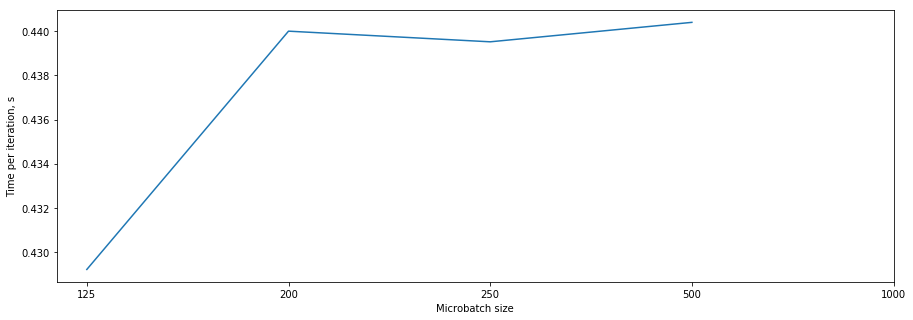

In [4]:
plt.figure(figsize = (15,5))
plt.plot(times)
plt.xticks(range(len(grid)), grid)
plt.xlabel('Microbatch size')
plt.ylabel('Time per iteration, s')
plt.show()